In [0]:
# Load the "online_retail_ii" table from the default Hive metastore into a DataFrame
retail_df = spark.table("hive_metastore.default.online_retail_ii")

# Display the first 5 rows of the DataFrame for a quick preview
retail_df.show(5)

# Print the schema to see column names, data types, and nullability
retail_df.printSchema()


+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|    13085.0|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|    22041|RECORD FRAME 7" S...|      48|2009-12-01 07:45:00|  2.1|    13085.0|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|2009-12-01 07:45:00| 1.25|    13085.0|United Kingdom|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
only showing top 5 rows
root
 |-- Invoice: string (nullable = true)
 |-- 

In [0]:
# Load the "online_retail_ii" table from the default catalog into a DataFrame
df = spark.table("online_retail_ii")

# Display the first 10 rows of the DataFrame to get an overview of the data
df.show(10)

# Print the schema to understand the structure and data types of the columns
df.printSchema()

# Count the total number of rows in the DataFrame
df.count()


+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
| 557112|    23243|SET OF TEA COFFEE...|       1|2011-06-16 16:31:00| 4.95|       NULL|United Kingdom|
| 557112|    23245|SET OF 3 REGENCY ...|       4|2011-06-16 16:31:00|10.79|       NULL|United Kingdom|
| 557112|    23251|VINTAGE RED ENAME...|       2|2011-06-16 16:31:00| 2.46|       NULL|United Kingdom|
| 557112|    23256|CHILDRENS CUTLERY...|       1|2011-06-16 16:31:00| 8.29|       NULL|United Kingdom|
| 557112|    23298|      SPOTTY BUNTING|       2|2011-06-16 16:31:00|10.79|       NULL|United Kingdom|
| 557112|    23300|GARDENERS KNEELIN...|       2|2011-06-16 16:31:00| 3.29|       NULL|United Kingdom|
| 557112|    23301|GARDENERS KNEELIN...|       5|2011-06-16 16:31:00| 3.2

1067371

In [0]:
# Remove all rows that contain any null (missing) values
df_cleaned = df.dropna()

# Display the first 5 rows of the cleaned DataFrame
df_cleaned.show(5)


+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|    13085.0|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|    22041|RECORD FRAME 7" S...|      48|2009-12-01 07:45:00|  2.1|    13085.0|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|2009-12-01 07:45:00| 1.25|    13085.0|United Kingdom|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
only showing top 5 rows


In [0]:
# Count the total number of rows remaining after removing null values
df_cleaned.count()

824364

In [0]:
# Display basic statistics (count, mean, stddev, min, max) for all numeric columns
df_cleaned.describe().show()

# Print the schema of the cleaned DataFrame to review column types and structure
df_cleaned.printSchema()


+-------+------------------+------------------+--------------------+------------------+------------------+------------------+-----------+
|summary|           Invoice|         StockCode|         Description|          Quantity|             Price|       Customer ID|    Country|
+-------+------------------+------------------+--------------------+------------------+------------------+------------------+-----------+
|  count|            824364|            824364|              824364|            824364|            824364|            824364|     824364|
|   mean| 537410.8855639135| 28235.64950336593|                NULL|12.414574144431343|3.6767995788221306| 15324.63850435002|       NULL|
| stddev|26666.396588954714|17751.858346002507|                NULL|188.97609900975894| 70.24138768949322|1697.4644503793095|       NULL|
|    min|            489434|             10002|  DOORMAT UNION J...|            -80995|               0.0|           12346.0|  Australia|
|    max|           C581569|      

In [0]:
# Remove rows with negative quantities (returns or data errors)
df_cleaned = df_cleaned.filter(df_cleaned["Quantity"] > 0)

# Create a new column "TotalPrice" by multiplying Quantity and Price
df_cleaned = df_cleaned.withColumn("TotalPrice", df_cleaned["Quantity"] * df_cleaned["Price"])

# Display the first 5 rows showing Quantity, Price, and the calculated TotalPrice
df_cleaned.select("Quantity", "Price", "TotalPrice").show(5)


+--------+-----+------------------+
|Quantity|Price|        TotalPrice|
+--------+-----+------------------+
|      12| 6.95|              83.4|
|      12| 6.75|              81.0|
|      12| 6.75|              81.0|
|      48|  2.1|100.80000000000001|
|      24| 1.25|              30.0|
+--------+-----+------------------+
only showing top 5 rows


In [0]:
# Group the data by country and calculate the total sales (sum of TotalPrice)
sales_by_country = df_cleaned.groupBy("Country") \
    .agg({"TotalPrice": "sum"}) \
    .withColumnRenamed("sum(TotalPrice)", "TotalSales")

# Display the top 10 countries with the highest total sales, in descending order
sales_by_country.orderBy("TotalSales", ascending=False).show(10)


+--------------+--------------------+
|       Country|          TotalSales|
+--------------+--------------------+
|United Kingdom|1.4723147517004045E7|
|          EIRE|    621631.110000009|
|   Netherlands|   554232.3400000022|
|       Germany|   431262.4610000001|
|        France|           355257.47|
|     Australia|  169968.10999999984|
|         Spain|  109178.52999999988|
|   Switzerland|  100365.34000000013|
|        Sweden|   91549.71999999986|
|       Denmark|   69862.19000000006|
+--------------+--------------------+
only showing top 10 rows


In [0]:
# Group the data by product description and calculate total sales for each product
top_products = df_cleaned.groupBy("Description") \
    .agg({"TotalPrice": "sum"}) \
    .withColumnRenamed("sum(TotalPrice)", "TotalSales")

# Display the 10 products that generated the most revenue
top_products.orderBy("TotalSales", ascending=False).show(10)


+--------------------+------------------+
|         Description|        TotalSales|
+--------------------+------------------+
|REGENCY CAKESTAND...| 286486.3000000009|
|WHITE HANGING HEA...| 252072.4600000032|
|PAPER CRAFT , LIT...|          168469.6|
|              Manual|152340.56999999986|
|JUMBO BAG RED RET...|136980.08000000095|
|ASSORTED COLOUR B...|127074.17000000025|
|             POSTAGE|126563.03999999998|
|       PARTY BUNTING| 103880.2300000005|
|MEDIUM CERAMIC TO...|          81416.73|
|PAPER CHAIN KIT 5...| 79594.33000000005|
+--------------------+------------------+
only showing top 10 rows


In [0]:
# Group the data by product description and calculate the total quantity sold for each product
top_quantity_products = df_cleaned.groupBy("Description") \
    .agg({"Quantity": "sum"}) \
    .withColumnRenamed("sum(Quantity)", "TotalQuantity")

# Display the 10 products that were sold in the highest quantity
top_quantity_products.orderBy("TotalQuantity", ascending=False).show(10)


+--------------------+-------------+
|         Description|TotalQuantity|
+--------------------+-------------+
|WORLD WAR 2 GLIDE...|       109169|
|WHITE HANGING HEA...|        93640|
|PAPER CRAFT , LIT...|        80995|
|ASSORTED COLOUR B...|        79913|
|MEDIUM CERAMIC TO...|        77916|
|JUMBO BAG RED RET...|        75759|
| BROCADE RING PURSE |        71129|
|PACK OF 60 PINK P...|        55270|
|60 TEATIME FAIRY ...|        53495|
|PACK OF 72 RETROS...|        46107|
+--------------------+-------------+
only showing top 10 rows


In [0]:
from pyspark.sql.functions import month

# Add a new column "Month" by extracting the month number from the InvoiceDate column
df_cleaned = df_cleaned.withColumn("Month", month(df_cleaned["InvoiceDate"]))

# Group the data by month and calculate total sales for each month
monthly_sales = df_cleaned.groupBy("Month") \
    .sum("TotalPrice") \
    .withColumnRenamed("sum(TotalPrice)", "MonthlySales")

# Display the total sales for each month in chronological order
monthly_sales.orderBy("Month").show()


+-----+------------------+
|Month|      MonthlySales|
+-----+------------------+
|    1|  1126764.10199994|
|    2| 953508.4159999544|
|    3|1295109.7509998763|
|    4| 1063809.552999937|
|    5|1278580.3499999687|
|    6| 1300280.269999993|
|    7|1191727.7510000165|
|    8|1249586.5500000077|
|    9|1784453.3829999869|
|   10| 2075998.789999885|
|   11|2334153.4219998103|
|   12| 2089456.839999781|
+-----+------------------+



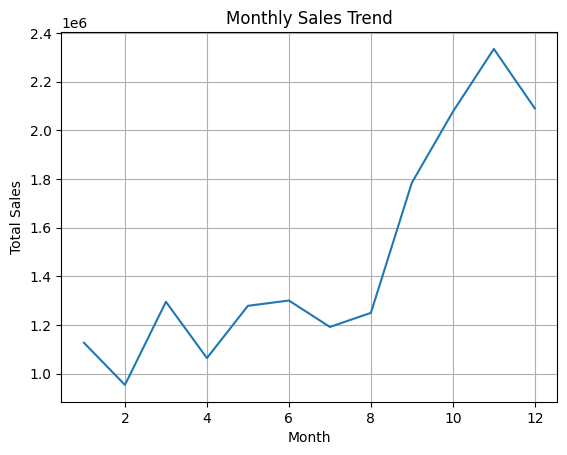

In [0]:
# 🎯 Convert the Spark DataFrame to a Pandas DataFrame for visualization
monthly_sales_pd = monthly_sales.orderBy("Month").toPandas()

import matplotlib.pyplot as plt

# 🎯 Plot the monthly sales trend using a line chart
plt.plot(monthly_sales_pd["Month"], monthly_sales_pd["MonthlySales"])
plt.title("Monthly Sales Trend")          # Set the title of the chart
plt.xlabel("Month")                       # Label the x-axis
plt.ylabel("Total Sales")                 # Label the y-axis
plt.grid(True)                            # Add a grid for better readability
plt.show()                                # Display the chart


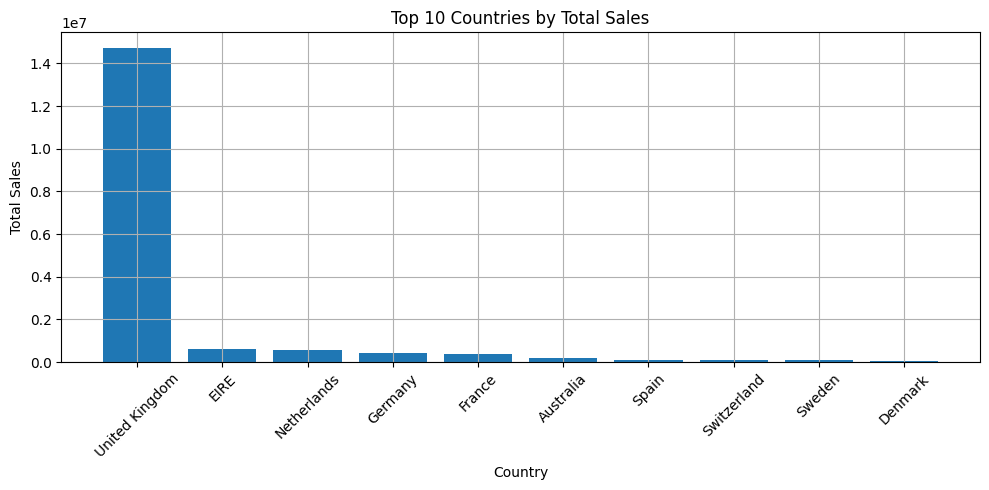

In [0]:
# Convert to Pandas for plotting
top_countries_pd = sales_by_country.orderBy("TotalSales", ascending=False).limit(10).toPandas()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_countries_pd["Country"], top_countries_pd["TotalSales"])
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


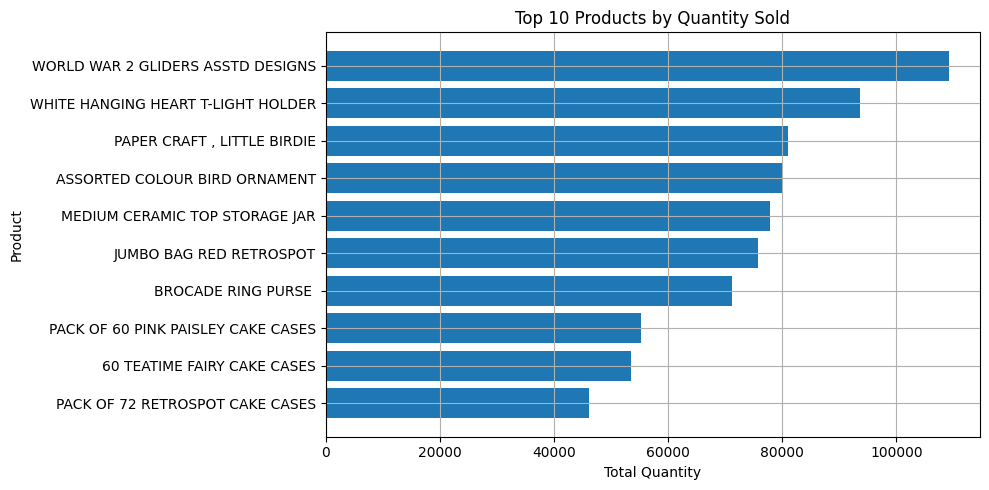

In [0]:
# Convert to Pandas
top_quantity_pd = top_quantity_products.orderBy("TotalQuantity", ascending=False).limit(10).toPandas()

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_quantity_pd["Description"], top_quantity_pd["TotalQuantity"])
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # To show the highest on top
plt.grid(True)
plt.tight_layout()
plt.show()


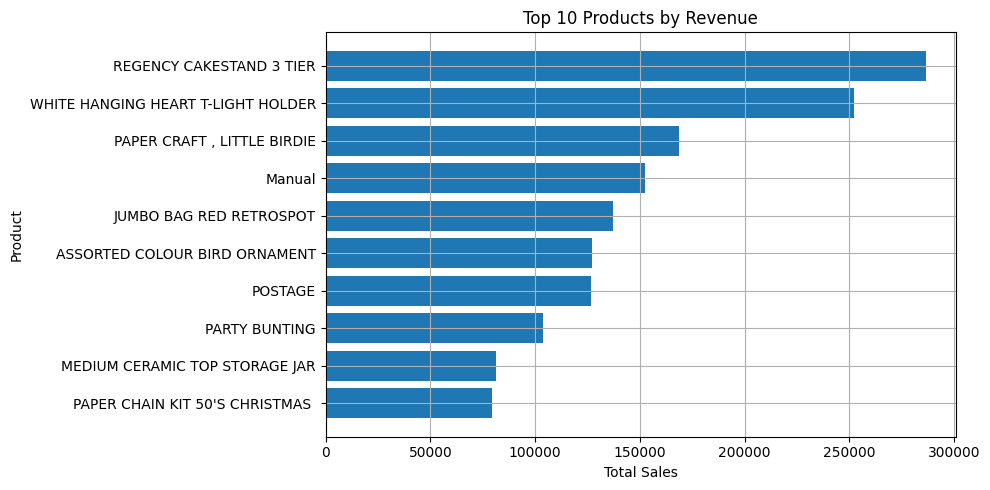

In [0]:
# Convert to Pandas
top_products_pd = top_products.orderBy("TotalSales", ascending=False).limit(10).toPandas()

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_products_pd["Description"], top_products_pd["TotalSales"])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
